In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
datas=pd.read_csv('/content/car_age_price.csv')
datas.head(50)

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000
5,2015,350000
6,2016,425000
7,2017,575000
8,2017,509999
9,2017,575000


In [3]:
datas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [4]:
datas.describe()

,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


To check if there is any null values

In [5]:
datas.isnull().sum()

Year     0
Price    0
dtype: int64

computing the correlation coefficient of price and Year:

In [6]:
datas.Year.corr(datas.Price)

0.776302138641932

In [7]:
datascorr=datas.corr()
datascorr

,Year,Price
Year,1.000000,0.776302
Price,0.776302,1.000000


We could observe from the value above, that there’s a high correlation between Price and Year and the coefficient is close to +1, it indicates a strong positive linear relationship.

<Axes: xlabel='Price', ylabel='Year'>

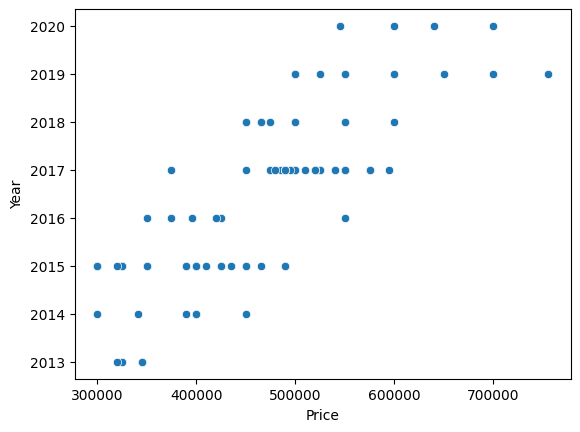

In [8]:
sns.scatterplot(datas,
                 x='Price',
                 y='Year')



<Axes: ylabel='Price'>

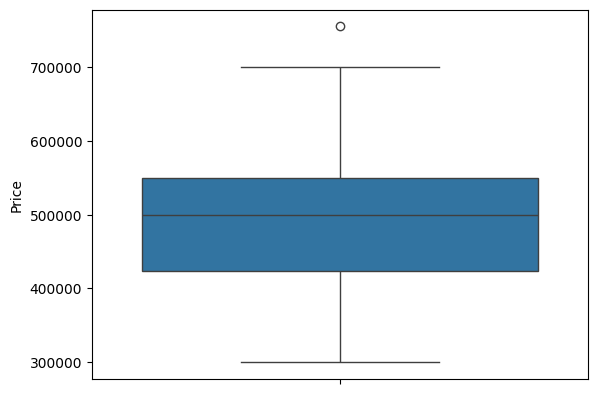

In [9]:
sns.boxplot(data=datas['Price'])

In [10]:
#Removing outlayers
datas.drop(datas[(datas['Price'] ==755000)].index, inplace=True)
datas

,Year,Price
0,2018,465000
2,2019,700000
3,2018,465000
4,2018,465000
5,2015,350000
...,...,...
107,2016,375000
108,2014,300000
109,2015,425000
110,2016,420000


<Axes: ylabel='Price'>

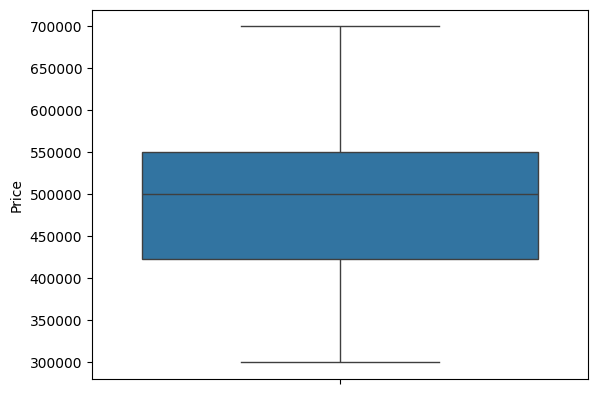

In [11]:
sns.boxplot(data=datas['Price'])

<Axes: xlabel='Price', ylabel='Count'>

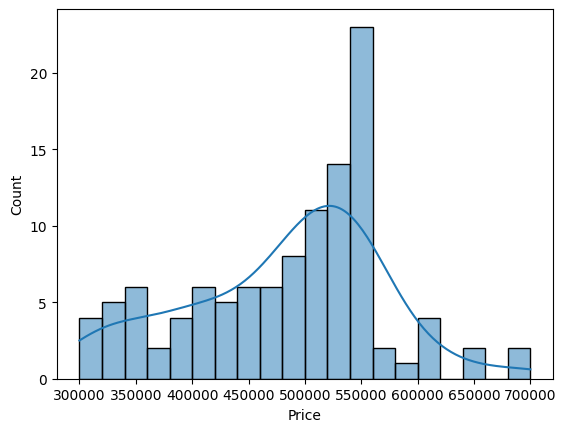

In [12]:
sns.histplot(datas['Price'],bins=20,kde=True)

In [13]:
y = datas['Price']  # dependent feature
X = datas.drop('Price', axis=1) #independent feature

In [14]:
X.shape

(111, 1)

In [15]:
y.shape #we neeed to reshape the size

(111,)

In [16]:
y=np.array(y)
y=y.reshape(-1,1)

In [17]:
y.shape

(111, 1)

Transforming the data

In [18]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=scaler.fit_transform(X)
y=scaler.fit_transform(y)

Splitting data into train and test

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.20)


In [20]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(88, 1) (23, 1) (88, 1) (23, 1)


Doing Linear Regreassion

In [21]:
from sklearn import linear_model
lr_model=linear_model.LinearRegression()
model=lr_model.fit(X_train,y_train)#remove errors and try to fix the data
predictions=lr_model.predict(X_test)
predictions

array([[-0.71707664],
       [ 0.68331636],
       [-0.71707664],
       [-0.71707664],
       [ 0.21651869],
       [-0.71707664],
       [ 0.21651869],
       [ 1.15011402],
       [ 1.61691169],
       [ 0.21651869],
       [-0.71707664],
       [-1.18387431],
       [ 0.68331636],
       [-0.71707664],
       [ 0.21651869],
       [ 0.21651869],
       [ 0.21651869],
       [-1.65067198],
       [-0.25027898],
       [ 1.15011402],
       [ 1.15011402],
       [ 0.21651869],
       [ 0.21651869]])

Linear Regression prediction

In [22]:
new_car = [[2022]]
prediction=lr_model.predict(new_car)
print("Predicted price of a 2022 model (Linear Regression):", prediction[0])


Predicted price of a 2022 model (Linear Regression): [1523.82639519]


Linear regression Error

In [23]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
print('Mean Squared error is:\n',mean_squared_error(y_test,predictions))
print('Mean absolute error is:\n',mean_absolute_error(y_test,predictions))
print('R2 score is:\n',r2_score(y_test,predictions))

Mean Squared error is:
 0.3084974150435969
Mean absolute error is:
 0.4235388157942654
R2 score is:
 0.7087665874512091


Doing with Lasso Regression

In [24]:
from sklearn.linear_model import Lasso
lasso_model = Lasso(alpha=0.01)
lasso_model.fit(X_train,y_train)
predictions2=lasso_model.predict(X_test)
predictions2

array([-0.70635183,  0.67464836, -0.70635183, -0.70635183,  0.21431496,
       -0.70635183,  0.21431496,  1.13498175,  1.59531515,  0.21431496,
       -0.70635183, -1.16668523,  0.67464836, -0.70635183,  0.21431496,
        0.21431496,  0.21431496, -1.62701862, -0.24601843,  1.13498175,
        1.13498175,  0.21431496,  0.21431496])

Prediction using Lasso

In [25]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
prediction2=lasso_model.predict(new_car)
prediction2

array([1502.72505524])

Error for lasso regression

In [26]:
print('Mean Squared error is:\n',mean_squared_error(y_test,predictions2))
print('Mean absolute error is:\n',mean_absolute_error(y_test,predictions2))
print('R2 score is:\n',r2_score(y_test,predictions2))

Mean Squared error is:
 0.3109597962735039
Mean absolute error is:
 0.426138577067289
R2 score is:
 0.7064420049632796


Linear Regression has lower MSE and MAE compared to Lasso Regression.
Linear Regression also has a slightly higher R2 score, indicating a slightly better fit.
So Linear Regression appears to perform slightly better than Lasso Regression.